In [25]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Intersite Comparison

## Prepare Data

In [26]:
# Input data
src_datadir = '/Users/patmccornack/Documents/ucsb_fog_project/SCI_Fog_Project_Repo/data/02_clean'
pozo_fname = 'sci-pozo-smo2-summer-clean-2021-2023.csv'
sauc_fname = 'sauc-summer-clean-2003-2008.csv'
upem_fname = 'upem-summer-clean-2005-2010.csv'

pozo_df = pd.read_csv(os.path.join(src_datadir, pozo_fname), index_col=0)
sauc_df = pd.read_csv(os.path.join(src_datadir, sauc_fname), index_col=0)
upem_df = pd.read_csv(os.path.join(src_datadir, upem_fname), index_col=0)

# Output data
out_datadir = '/Users/patmccornack/Documents/ucsb_fog_project/SCI_Fog_Project_Repo/data/02_clean'
out_fname = 'sci-sites-joined.csv'
out_fpath = os.path.join(out_datadir, out_fname)

In [27]:
pozo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29740 entries, 207 to 29948
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time (PST)              29740 non-null  object 
 1   fog                     29740 non-null  float64
 2   air temperature (C)     29740 non-null  float64
 3   relative humidity (%)   29740 non-null  float64
 4   wind speed (m/s)        29740 non-null  float64
 5   wind gust (m/s)         29740 non-null  float64
 6   wind direction (deg)    29740 non-null  float64
 7   rain (mm)               29740 non-null  float64
 8   solar radiation (kwm2)  29740 non-null  float64
 9   atm pressure (mb)       29740 non-null  float64
 10  leaf wetness (mv)       29740 non-null  float64
 11  fog tips                29740 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.9+ MB


In [28]:
sauc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87849 entries, 0 to 87849
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time (PST)             87849 non-null  object 
 1   fog                    87849 non-null  float64
 2   air temperature (C)    87849 non-null  float64
 3   relative humidity (%)  87849 non-null  float64
 4   wind speed (m/s)       87849 non-null  float64
 5   wind gust (m/s)        87849 non-null  float64
 6   wind direction (deg)   87849 non-null  float64
 7   rain (mm)              87849 non-null  float64
 8   fog tips               87849 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.7+ MB


In [29]:
upem_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48519 entries, 1475 to 49993
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time (PST)              48519 non-null  object 
 1   fog                     48519 non-null  float64
 2   air temperature (C)     48519 non-null  float64
 3   relative humidity (%)   48519 non-null  float64
 4   wind speed (m/s)        48519 non-null  float64
 5   wind gust (m/s)         48519 non-null  float64
 6   wind direction (deg)    48519 non-null  float64
 7   rain (mm)               48519 non-null  float64
 8   solar radiation (kwm2)  48519 non-null  float64
 9   fog tips                48519 non-null  float64
dtypes: float64(9), object(1)
memory usage: 4.1+ MB


## Join Data

In [30]:
pozo_df['site'] = 'smo2'
sauc_df['site'] = 'sauc'
upem_df['site'] = 'upem'

df = pd.concat([pozo_df, sauc_df, upem_df], axis=0)
df = df.dropna(axis=1)  # Drop non-shared columns
df.head(3)

,time (PST),fog,air temperature (C),relative humidity (%),wind speed (m/s),wind gust (m/s),wind direction (deg),rain (mm),fog tips,site
207,2021-08-08 11:00:00,0.0,19.53,81.0,2.114,4.26,141.5,0.0,0.0,smo2
208,2021-08-08 11:10:00,0.0,19.83,79.8,2.111,4.46,150.1,0.0,0.0,smo2
209,2021-08-08 11:20:00,0.0,20.13,79.0,1.933,3.63,147.9,0.0,0.0,smo2


## Check Distributions
Check that the distributions for each site are reasonably similar. Everything looks as expected given the site locations. 

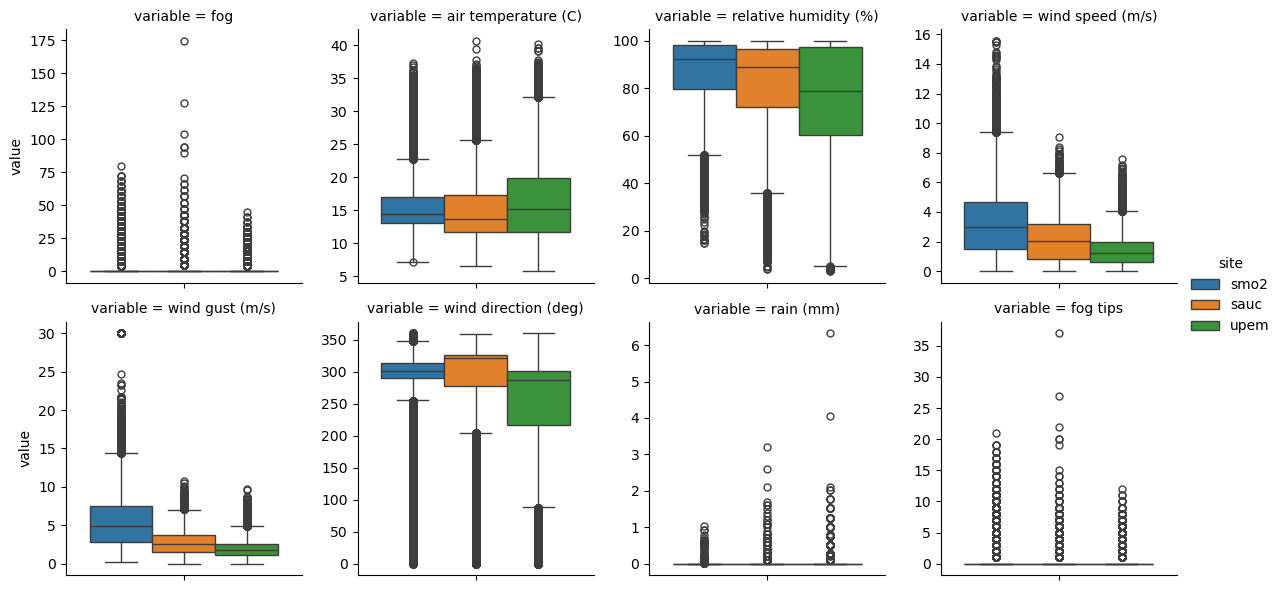

In [31]:
#### Quick plot of distributions ####
# Create long form data
value_col = df.columns.drop(['time (PST)', 'site']).tolist()
df_long = pd.melt(df, id_vars=['time (PST)', 'site'], value_vars=value_col)

# Plot boxplots
sns.catplot(data=df_long, kind='box', col='variable', y='value', hue='site',
            sharey=False, height=3, col_wrap=4)
plt.show()


## Save out intersite dataframe

In [32]:
df.to_csv(out_fpath)
print(out_fpath)

/Users/patmccornack/Documents/ucsb_fog_project/SCI_Fog_Project_Repo/data/02_clean/sci-sites-joined.csv
